In [1]:
using LinearAlgebra
using Distributions
using Plots
default(fmt=:png, ms=3, titlefontsize=10, tickfontsize=6)
plot(sin; size=(200, 150));

## 単なるGauss過程 = データ無しの段階でのGauss過程回帰

In [2]:
mu(x) = zero(x)
#mu(x) = sin(x)
g(x, x′; a=1, b=1, σ=0.2) = a * exp(-(x - x′)^2/(2b^2)) + σ^2 * (x == x′)

L = 600
x = range(-0.1π, 6.1π, L)
μ = mu.(x)
Σ = Symmetric(@.(g(x, x')))
mvn = MvNormal(μ, Σ)

FullNormal(
dim: 600
μ: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Σ: [1.04 0.9994714516932669 … 7.795960466301041e-83 4.140291225009543e-83; 0.9994714516932669 1.04 … 1.4663888627885543e-82 7.795960466301041e-83; … ; 7.795960466301041e-83 1.4663888627885543e-82 … 1.04 0.9994714516932668; 4.140291225009543e-83 7.795960466301041e-83 … 0.9994714516932668 1.04]
)


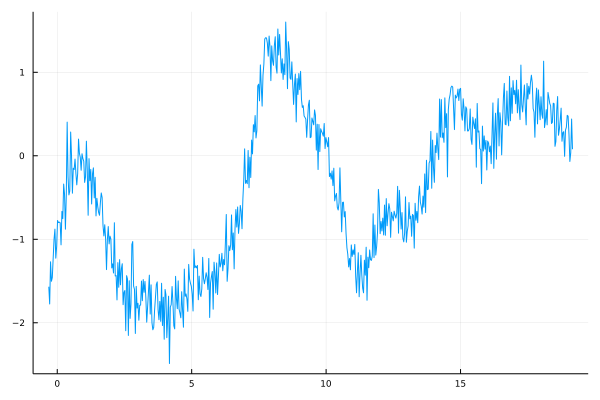

In [3]:
y = rand(mvn)
plot(x, y; label="")

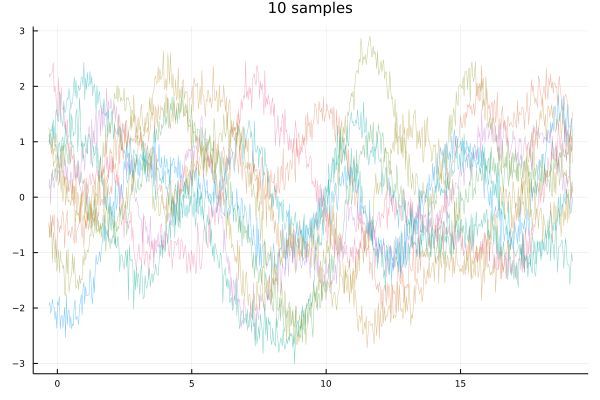

In [4]:
nsamples = 10
y = rand(mvn, nsamples)
plot(; title="$nsamples samples")
plot!(x, y; label="", lw=0.5, alpha=0.5)

## データから得られる条件付き確率分布の構成 = Gauss過程回帰

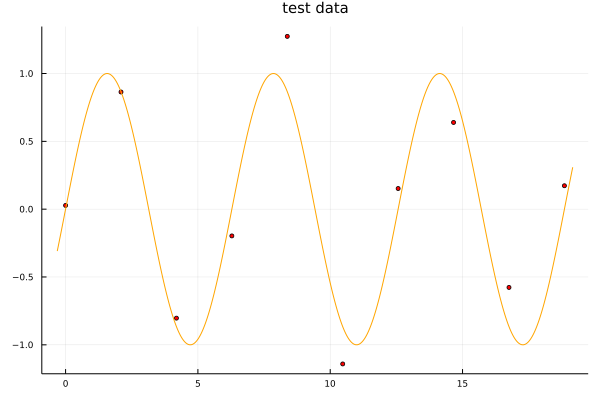

In [5]:
# テストデータの生成

n = 10
X = range(0, 6π, n)
Y = sin.(X) + 0.3randn(n)

L = 600
x = range(-0.1π, 6.1π, L) # 予測したい x の範囲

plot(; title="test data")
scatter!(X, Y; label = "", c=:red)
plot!(x, sin.(x); label="", c=:orange)

In [6]:
# Gauss過程回帰 = データ (X, Y) から得られる条件付き確率分布の構成

μ_X, μ_x = mu.(X), mu.(x)
Σ_XX, Σ_Xx, Σ_xX, Σ_xx = g.(X, X'), g.(X, x'), g.(x, X'), g.(x, x')
A = Σ_xX / Σ_XX
μ = μ_x + A * (Y - μ_X)
Σ = Symmetric(Σ_xx - A * Σ_Xx)
mvn_pred = MvNormal(μ, Σ)

FullNormal(
dim: 600
μ: [-0.018449419112147522, -0.014997759740003518, -0.011207264636672128, -0.007064201943748794, -0.002555048195100597, 0.002333449939426173, 0.0076142110362480775, 0.013299751538745963, 0.019402115754276677, 0.025932803391971494  …  0.16633066003304858, 0.17067974478630007, 0.17453459018692255, 0.17790456900358925, 0.18080004444969236, 0.1832323090149019, 0.18521352192969895, 0.18675664547488766, 0.1878753803511486, 0.18858410032657208]
Σ: [0.16664556677007802 0.11779717105858023 … 3.180127417365007e-10 3.433816886279912e-10; 0.11779717105858023 0.1499115826245414 … 2.945180458248898e-10 3.180127417365022e-10; … ; 3.180127417365007e-10 2.945180458248898e-10 … 0.14991158262453952 0.11779717105857879; 3.433816886279912e-10 3.180127417365022e-10 … 0.11779717105857879 0.16664556677007725]
)


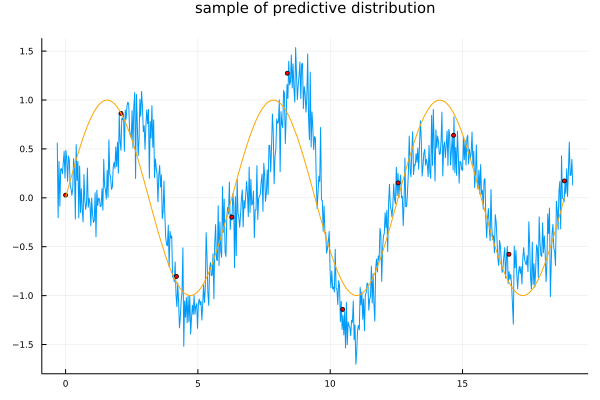

In [7]:
y = rand(mvn_pred)

plot(; legend=:outertop)
plot!(x, y; label="", title="sample of predictive distribution")
scatter!(X, Y; label = "", c=:red)
plot!(sin, extrema(X)...; label="", c=:orange)

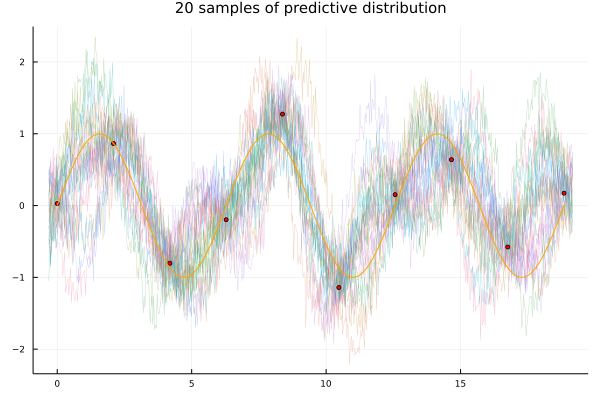

In [8]:
nsamples = 20
y = rand(mvn_pred, nsamples)

plot(; title="$nsamples samples of predictive distribution")
plot!(x, y; label="", lw=0.3, alpha=0.5)
scatter!(X, Y; label = "", c=:red)
plot!(sin, extrema(X)...; label="", c=:orange)

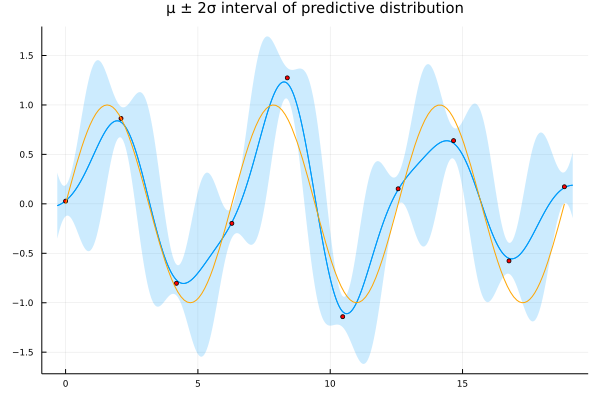

In [9]:
s = diag(Σ)
plot(; title="μ ± 2σ interval of predictive distribution")
plot!(x, [μ μ]; label="", fillrange=[μ-2s μ+2s], c=1, fillalpha=0.2)
scatter!(X, Y; label = "", c=:red)
plot!(sin, extrema(X)...; label="", c=:orange)